In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Renamig DiabatesPedigreeFucntion as DPF

df=df.rename(columns={"DiabetesPedigreeFunction":"DPF"})

In [4]:
#Checking for the null values 

count_nan=df.isnull().sum()
print(count_nan)

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


In [5]:
#Checking if zero values are present in these columns

print(0 in df['Glucose'].values)
print(0 in df['BloodPressure'].values)
print(0 in df['SkinThickness'].values)
print(0 in df['Insulin'].values)
print(0 in df['BMI'].values)



True
True
True
True
True


In [6]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN

df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Exploring Distribution

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

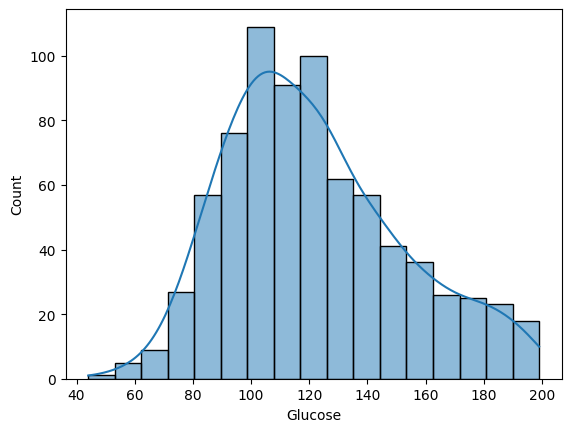

In [8]:
import seaborn as sns
sns.histplot(data=df_copy, x='Glucose', kde=True)

<AxesSubplot: xlabel='Glucose'>

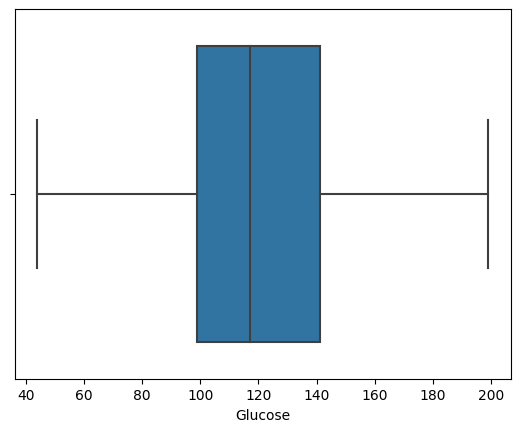

In [9]:
sns.boxplot(data=df_copy, x='Glucose')

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

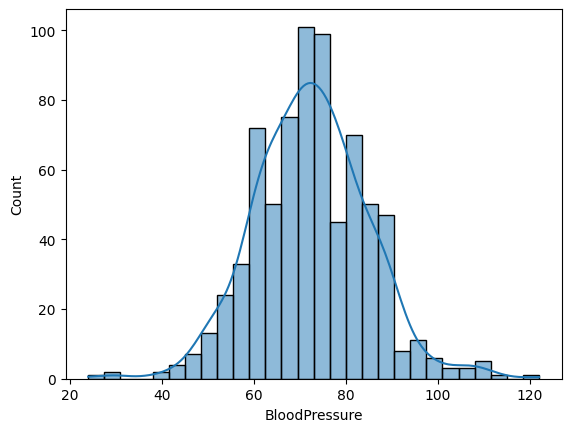

In [10]:
sns.histplot(data=df_copy, x='BloodPressure', kde=True)

<AxesSubplot: xlabel='BloodPressure'>

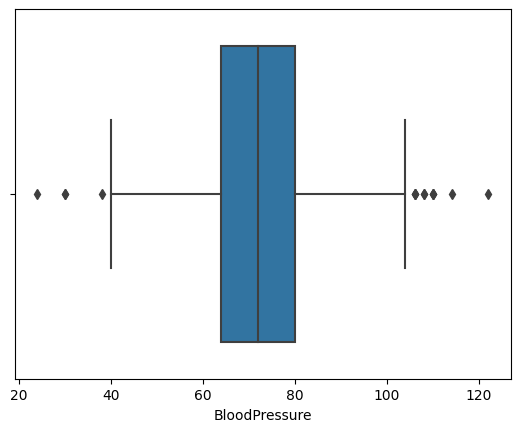

In [11]:
sns.boxplot(data=df_copy, x='BloodPressure')

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

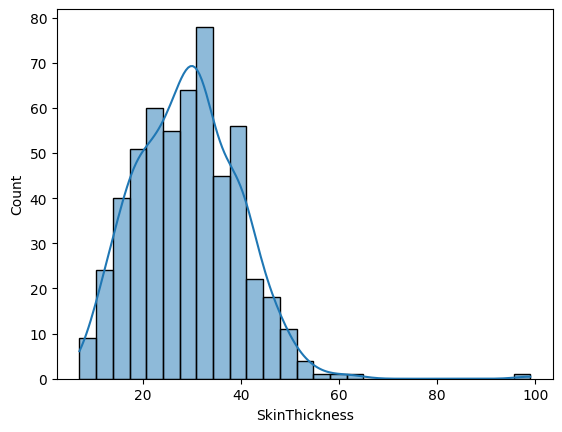

In [12]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
sns.histplot(data=df_copy, x='SkinThickness', kde=True)

<AxesSubplot: xlabel='SkinThickness'>

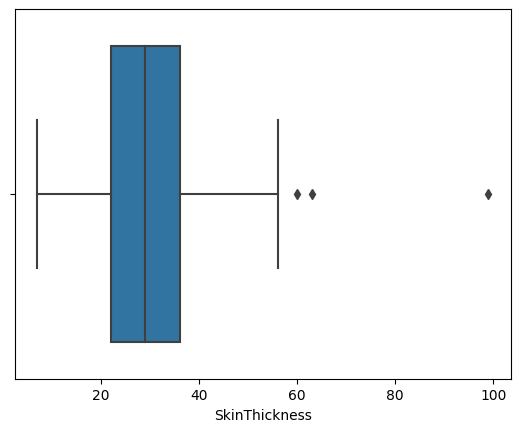

In [13]:
sns.boxplot(data=df_copy, x='SkinThickness')

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

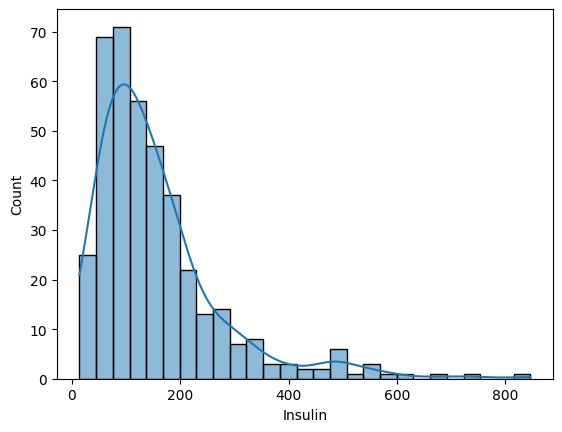

In [14]:
sns.histplot(data=df_copy, x='Insulin', kde=True)

<AxesSubplot: xlabel='Insulin'>

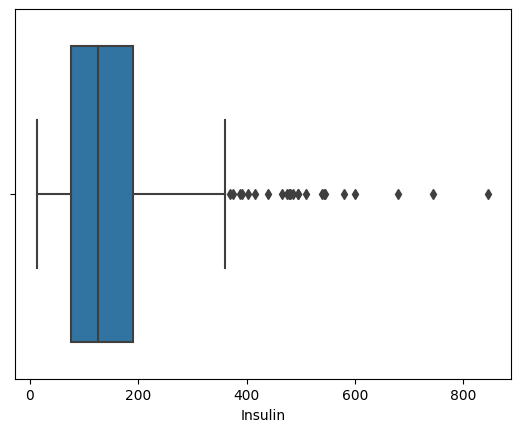

In [15]:
sns.boxplot(data=df_copy, x='Insulin')

<AxesSubplot: xlabel='BMI', ylabel='Count'>

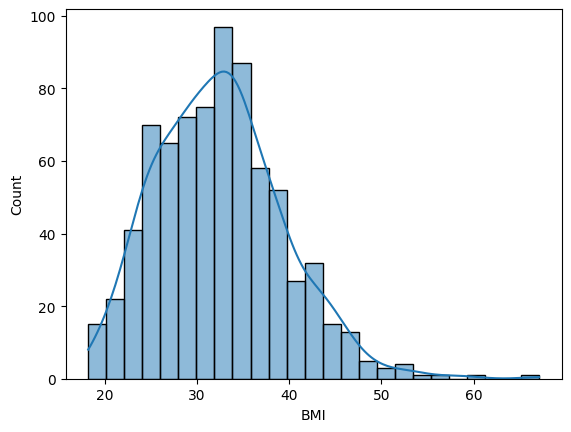

In [16]:
sns.histplot(data=df_copy, x='BMI', kde=True)

<AxesSubplot: xlabel='BMI'>

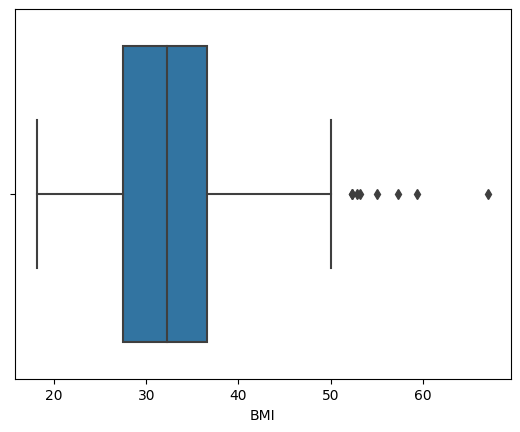

In [17]:
sns.boxplot(data=df_copy, x='BMI')

## Replacing NaN value by mean, median depending upon distribution


In [18]:
df_copy['Glucose']=df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

In [19]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [20]:
#df_copy.dtypes

In [21]:
df_copy.isin([0]).sum(axis=0)

Pregnancies      111
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin            0
BMI                0
DPF                0
Age                0
Outcome          500
dtype: int64

### Model Buliding

In [22]:
from sklearn.model_selection import train_test_split

X=df_copy.drop(columns='Outcome')
y=df_copy['Outcome']

In [23]:
#X

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=123)

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)


In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

### creating Pickle file


In [27]:
filename='diabetes-prediction-model.pkl'
pickle.dump(model, open(filename,'wb'))